# Hierachical Clustering for WSe2-WS2 wide junction
                                                                        ---Chuqiao Shi 

## Import packages

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
# Import the Node class and the helper functions

from   root_class        import *
import helper_function   as hf

# Import necessary packages

import numpy             as np
import matplotlib.pyplot as plt
import h5py

/opt/anaconda3/lib/python3.7/site-packages/sparse/_coo/numba_extension.py:18: NumbaDeprecationWarning: No direct replacement for 'numba.targets' available. Visit https://gitter.im/numba/numba-dev to request help. Thanks!
  from numba.targets.imputils import impl_ret_borrowed, lower_constant
/opt/anaconda3/lib/python3.7/site-packages/sparse/_coo/numba_extension.py:18: NumbaDeprecationWarning: An import was requested from a module that has moved location.
Import requested from: 'numba.targets.imputils', please update to use 'numba.core.imputils' or pin to Numba version 0.48.0. This alias will not be present in Numba version 0.50.0.
  from numba.targets.imputils import impl_ret_borrowed, lower_constant
/opt/anaconda3/lib/python3.7/site-packages/sparse/_coo/numba_extension.py:18: NumbaDeprecationWarning: An import was requested from a module that has moved location.
Import of 'impl_ret_borrowed' requested from: 'numba.targets.imputils', please update to use 'numba.core.imputils' or pin to 

## Preprocessing

In [3]:
file_path = '/Users/shichuqiao/Desktop/Rice Projects/Unsupervised Learning/Other data/data_mats_from_Yimo/cbed_wide.mat'

In [4]:
data = hf.read_4D(file_path)

In [5]:
wide_node = FileClass(data)

In [6]:
wide_node.alignment()

 255,255          Mean of the center =  (62.24360169466323, 61.911563180494326)
Std of the center =  (0.029989485166642134, 0.05929049602587609)


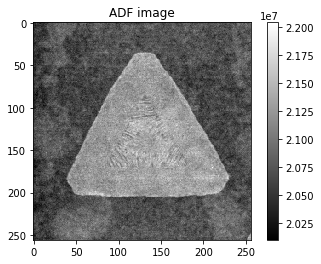

In [7]:
adf_image = wide_node.getADF()

plt.title('ADF image')
plt.imshow(adf_image, cmap='gray')
plt.colorbar()
plt.show()

In [8]:
log_std_map = wide_node.getLogStdMap()

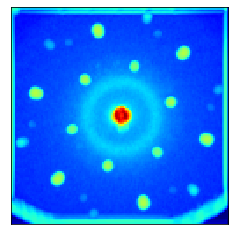

In [9]:
# plt.title('std map')
plt.imshow(log_std_map, vmin = 1,vmax = 10, cmap='jet')
# plt.colorbar()

plt.xticks([]); plt.yticks([])
plt.show()

In [10]:
r_theta_map = wide_node.getRThetaPlot()

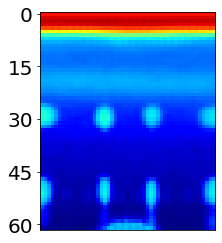

In [11]:
plt.subplot(111)

# plt.title('std map')
plt.imshow(r_theta_map, vmax = 2.4,cmap='jet')
plt.xticks([])
plt.yticks(np.arange(0,70,15), fontsize = 20)
# plt.colorbar()
plt.show()

In [12]:

in_r = 24; out_r = 57; 

wide_node.getMasked(in_r, out_r)

In [13]:
log_std_map2 = wide_node.getLogStdMap()

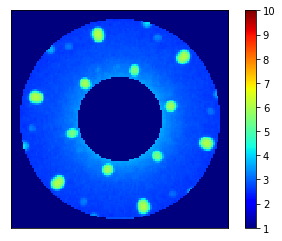

In [14]:
# plt.title('std map')
plt.imshow(log_std_map2,vmin = 1,vmax = 10, cmap='jet')
plt.xticks([]); plt.yticks([])
plt.colorbar()
plt.show()

In [15]:
sel = log_std_map2 < np.max(log_std_map) * 0.3
log_std_map2[sel] = 0

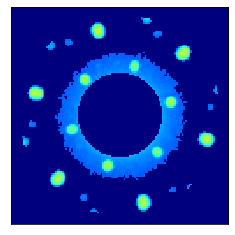

In [16]:
# plt.title('std map')
plt.imshow(log_std_map2, vmin=1, vmax = 10,cmap='jet')
plt.xticks([]); plt.yticks([])
# plt.colorbar()
plt.show()

In [17]:
sel = log_std_map2<np.max(log_std_map) * 0.3


In [18]:
std_mask = np.ones(np.shape(log_std_map2))
std_mask[sel] = 0

In [19]:
threshold = np.max(log_std_map) * 0.3
wide_node.getStdMasked(threshold=threshold)

In [33]:
manifold = wide_node.getManifold()

/opt/anaconda3/lib/python3.7/site-packages/numba/np/ufunc/parallel.py:355: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 11000. The TBB threading layer is disabled.
  warnings.warn(problem)


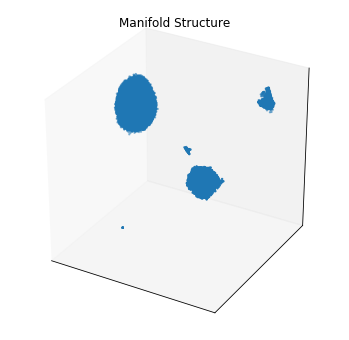

In [47]:
# Plot the manifold structure of the whole dataset
fig = plt.figure(figsize=(6,6))

ax1  = fig.add_subplot(111, projection='3d')
im  = ax1.scatter(manifold[:,0], manifold[:,1], 
                  manifold[:,2],s=2)
plt.title('Manifold Structure')
plt.xticks([]),plt.yticks([])
ax1.set_zticks([])
plt.show()

## First Round Clustering

In [20]:
cluster_node = ClusterClass(data= wide_node.data, cluster_data=wide_node.std_masked_data)

In [21]:
sse1 = cluster_node.choose_k_cluster(False)

2


In [22]:
cluster_node.getCluster()

In [23]:
real_space_map = cluster_node.getRealSpaceMap()

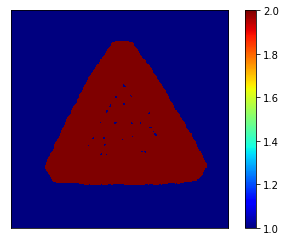

In [24]:
plt.imshow(real_space_map, cmap='jet')
plt.xticks([])
plt.yticks([])
plt.colorbar()
plt.show()

In [25]:
centers = cluster_node.getClusterCenters()

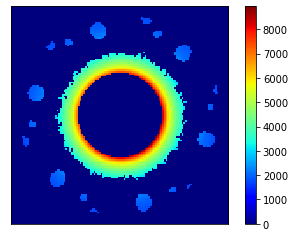

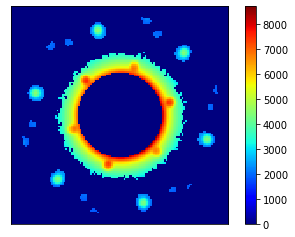

In [37]:
for i in range(len(centers)):
    plt.imshow(centers[i] * std_mask, cmap='jet')
    plt.xticks([])
    plt.yticks([])
    plt.colorbar()
    plt.show()

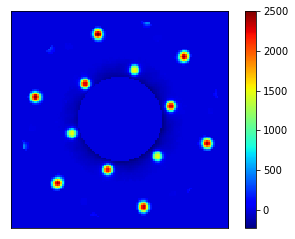

In [29]:
plt.imshow((centers[1] - centers[0]) * std_mask, cmap='jet')
plt.xticks([])
plt.yticks([])
plt.colorbar()
plt.show()

In [30]:
cluster_node.getSubClusters()

In [31]:
sample_node = cluster_node.sub_clusters[1]

## Second Round Clustering

In [32]:
sse2 = sample_node.choose_k_cluster(False)

2


In [33]:
sample_node.getCluster()
real_space_map2 = sample_node.getRealSpaceMap()

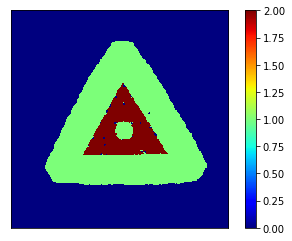

In [34]:
plt.imshow(real_space_map2, cmap='jet')
plt.xticks([])
plt.yticks([])
plt.colorbar()
plt.show()

In [39]:
centers_sample = sample_node.getClusterCenters()

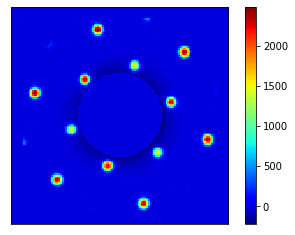

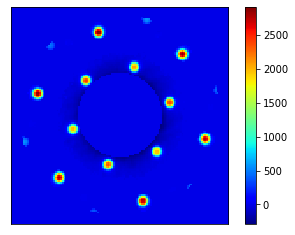

In [43]:
for i in range(len(centers_sample)):
    plt.imshow((centers_sample[i]-centers[0]) * std_mask, cmap = 'jet')
    plt.xticks([])
    plt.yticks([])
    plt.colorbar()
    plt.show()

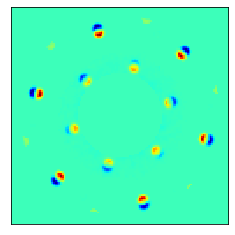

In [45]:
plt.imshow((centers_sample[1] - centers[1]) * std_mask, cmap='jet')
plt.xticks([])
plt.yticks([])
# plt.colorbar()
plt.show()

In [46]:
sample_node.getSubClusters()

In [47]:
WS2_node  = sample_node.sub_clusters[0]
WSe2_node = sample_node.sub_clusters[1]

## Third Round Clustering -- WS2

In [62]:
WS2_sse = WS2_node.choose_k_cluster(False)

2


In [65]:
WS2_node.getCluster()
real_space_map_WS2 = WS2_node.getRealSpaceMap()


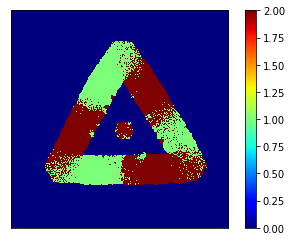

In [66]:
plt.imshow(real_space_map_WS2, cmap='jet')
plt.xticks([])
plt.yticks([])
plt.colorbar()
plt.show()

In [67]:
centers_WS2        = WS2_node.getClusterCenters()

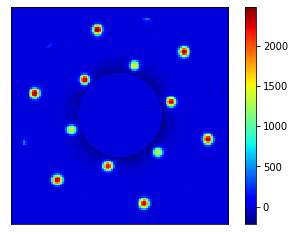

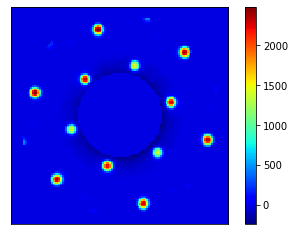

In [68]:
for i in range(len(centers_WS2)):
    plt.imshow((centers_WS2[i] - centers[0]) * std_mask, cmap = 'jet')
    plt.xticks([])
    plt.yticks([])
    plt.colorbar()
    plt.show()

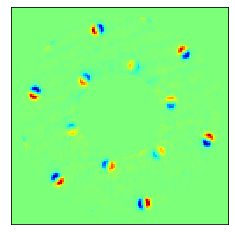

In [69]:
plt.imshow(centers_WS2[0]-centers_WS2[1], cmap = 'jet')
plt.xticks([])
plt.yticks([])
plt.show()

## Third Round Clustering -- WSe2

In [70]:
sse_WSe2 = WSe2_node.choose_k_cluster(False)

4


In [71]:
WSe2_node.getCluster()
real_space_map_WSe2 = WSe2_node.getRealSpaceMap()
centers_WSe2= WSe2_node.getClusterCenters()

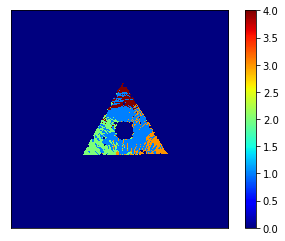

In [72]:
plt.imshow(real_space_map_WSe2, cmap='jet')
plt.xticks([])
plt.yticks([])
plt.colorbar()
plt.show()

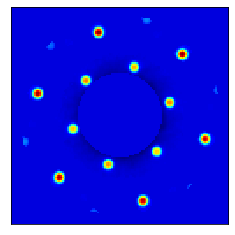

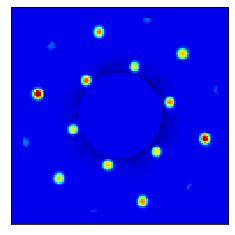

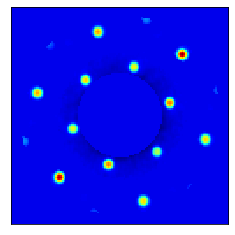

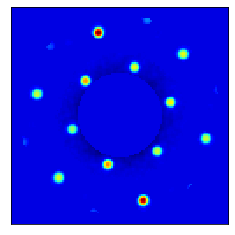

In [74]:
for i in range(len(centers_WSe2)):
    plt.imshow((centers_WSe2[i] -centers[0] )* std_mask, cmap = 'jet')
    plt.xticks([])
    plt.yticks([])
    plt.show()